# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data_path = '../part02/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [3]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [4]:
df.isnull().sum()

Pclass      0
Age       263
SibSp       0
Parch       0
Fare        1
dtype: int64

# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

# 補 平均值的結果大於補 0, 大於補 -1
## 原因很簡單，因為大部分的缺失值都在 Age, 補平均值當然比 0, -1 好了


In [5]:
import warnings
warnings.filterwarnings('ignore')
# 空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
re_N1=cross_val_score(estimator, train_X, train_Y, cv=5).mean()

"""
Your Code Here
"""
df_z0 = df.fillna(0)
train_X = df_z0[:train_num]
estimator = LogisticRegression()
re_0=cross_val_score(estimator, train_X, train_Y, cv=5).mean()


df_m=df.fillna(df.mean())
train_X = df_m[:train_num]
estimator = LogisticRegression()
re_m=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(f'fill -1, {re_N1}')
print(f'fill 0, {re_0}')
print(f'fill 0, {re_m}')

print('fill mean is better than fill zeor, and fill -1 is worst')

fill -1, 0.6960299128976762
fill 0, 0.6971535084032942
fill 0, 0.6981761033723469
fill mean is better than fill zeor, and fill -1 is worst


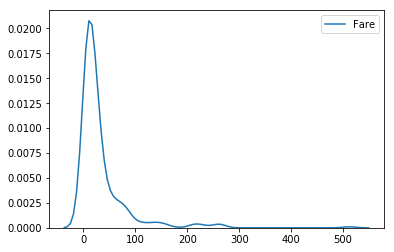

In [6]:
df.Faremean=df.Fare.fillna(df.Fare.mean())
import seaborn as sns
sns.kdeplot(df.Faremean)



## 右邊有長尾巴，所以補 median() 看看

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

# Answer 結果是 作 MinMax 的結果最好，比較訝異的是標準化結果最差，要好好研究。

## 右邊有長尾巴，所以補 median() 看看
    
    '''
    Age 都是補 mean, 但是 Fare 分別為 mean, mode, media 與 10000， 
    
    fill mean, 0.69818
    fill mean, then minmax 0.69935
    fill mean, then standard normalization 0.69594


    fill mode, 0.69818
    fill mode, then minmax 0.69935
    fill mode, then standard normalization 0.69594

    fill median, 0.69818
    fill median, then minmax 0.69935
    fill median, then standard normalization 0.69594

## 比較有趣的是 Fare 補 10000 時，minmax 升到 0.70383

    fill 10000, 0.69818
    fill 10000, then minmax 0.70383
    fill 10000, then standard normalization 0.69369

    '''

In [7]:
"""
Your Code Here
"""
import warnings
warnings.filterwarnings('ignore')
#df.Fare=df.Fare.fillna(df.Fare.median())
df.Fare=df.Fare.fillna(10000)

df_m=df.fillna(df.mean())

df_mo=df_m

df_mmm = MinMaxScaler().fit_transform(df_m)
df_msn =StandardScaler().fit_transform(df_m)

train_X = df_mo[:train_num]
estimator = LogisticRegression()
re_mo=cross_val_score(estimator, train_X, train_Y, cv=5).mean()

train_X = df_mmm[:train_num]
estimator = LogisticRegression()
re_mmm=cross_val_score(estimator, train_X, train_Y, cv=5).mean()

train_X = df_msn[:train_num]
estimator = LogisticRegression()
re_msn=cross_val_score(estimator, train_X, train_Y, cv=5).mean()

print(f'fill median, {re_mo:.5f}\n')
print(f'fill median, then minmax {re_mmm:.5f}\n')
print(f'fill median, then standard normalization {re_msn:.5f}\n')


'''
Age 都是補 mean, 但是 Fare 分別為 mean, mode, media 與 10000， 

fill mean, 0.69818

fill mean, then minmax 0.69935

fill mean, then standard normalization 0.69594


fill mode, 0.69818

fill mode, then minmax 0.69935

fill mode, then standard normalization 0.69594


fill median, 0.69818

fill median, then minmax 0.69935

fill median, then standard normalization 0.69594

比較有趣的是 Fare 補 10000 時，minmax 升到 0.70383

fill 10000, 0.69818

fill 10000, then minmax 0.70383

fill 10000, then standard normalization 0.69369

'''

fill median, 0.69818

fill median, then minmax 0.70383

fill median, then standard normalization 0.69369



'\nAge 都是補 mean, 但是 Fare 分別為 mean, mode, media 與 10000， \n\nfill mean, 0.69818\n\nfill mean, then minmax 0.69935\n\nfill mean, then standard normalization 0.69594\n\n\nfill mode, 0.69818\n\nfill mode, then minmax 0.69935\n\nfill mode, then standard normalization 0.69594\n\n\nfill median, 0.69818\n\nfill median, then minmax 0.69935\n\nfill median, then standard normalization 0.69594\n\n比較有趣的是 Fare 補 10000 時，minmax 升到 0.70383\n\nfill 10000, 0.69818\n\nfill 10000, then minmax 0.70383\n\nfill 10000, then standard normalization 0.69369\n\n'